In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

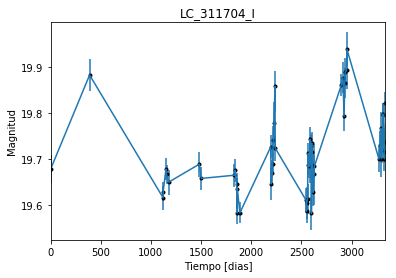

In [2]:
data = np.genfromtxt('LC_311704_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311704_I')
plt.savefig("LC_311704_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

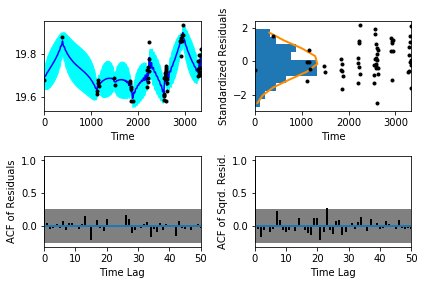

In [5]:
sample.assess_fit()

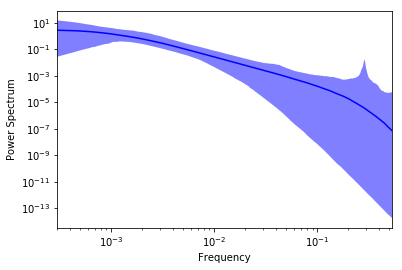

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

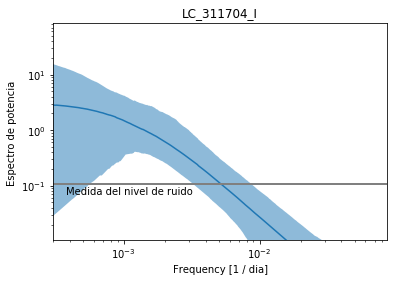

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311704_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311704_I')

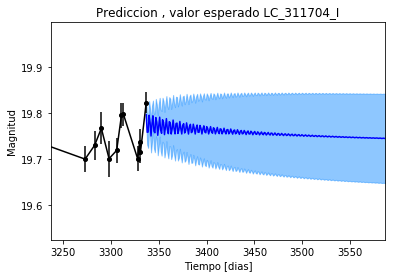

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311704_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311704_I')

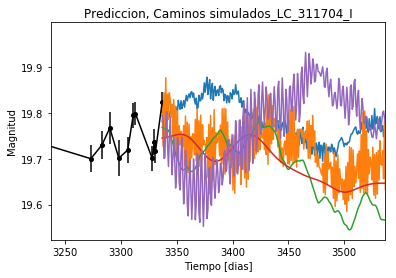

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311704_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


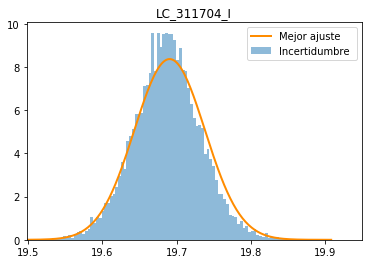

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311704_I')
plt.savefig("Mejor_ajuste_LC_311704_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311704_I')

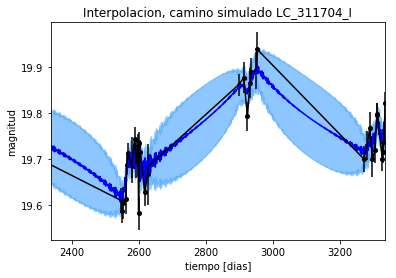

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_I')

Text(0.5,1,'Interpolacion, camino simulado LC_311704_I')

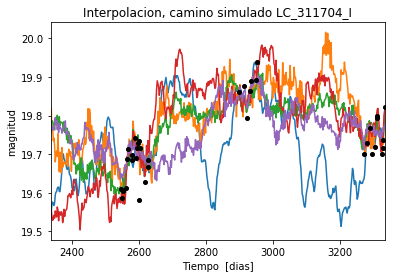

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 772.289332924
Median: 0.0139949517002
Standard deviation: 0.20192152159
68% credibility interval: [ 0.0023716   0.21184573]
95% credibility interval: [  4.67723828e-04   7.89867185e-01]
99% credibility interval: [  3.30377609e-04   1.02297373e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 886.220977633
Median: 0.00720182212145
Standard deviation: 0.11453883726
68% credibility interval: [ 0.00110055  0.05409692]
95% credibility interval: [  3.63821870e-04   3.88300430e-01]
99% credibility interval: [  3.28524752e-04   8.12479285e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 334.464456745
Median: 0.142775923694
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 445.808797607
Median: 110.483401471
Standard deviation: 2.17519268256
68% credibility interval: [ 108.42062266  112.32934373]
95% credibility interval: [ 105.88426736  114.7223079 ]
99% credibility interval: [ 103.60546377  115.38015068]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 697.062818447
Median: 1.54391806382
Standard deviation: 2.79794671843
68% credibility interval: [ 0.26195213  5.37572327]
95% credibility interval: [  0.04235727  10.53898266]
99% credibility interval: [  0.02415611  12.91936701]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 953.239690261
Median: 3.4354517004
Standard deviation: 13.2052223612
68% credibility interval: [  0.35142456  20.08416112]
95% credibility interval: [  2.51084085

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 21831.4649118
Median: 1.09247287802e-46
Standard deviation: 4.83544109697e+44
68% credibility interval: [  8.83987700e-87   7.35516505e-03]
95% credibility interval: [  1.56972509e-140   1.52411203e+032]
99% credibility interval: [  5.77901123e-151   9.64836565e+042]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1923.58052418
Median: 19.7207428237
Standard deviation: 0.0422500624108
68% credibility interval: [ 19.68619416  19.75906414]
95% credibility interval: [ 19.63888115  19.80950164]
99% credibility interval: [ 19.58927035  19.85571014]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 490.862757906
Median: 0.227745374115
Standard deviation: 0.280907069625
68% credibility interval: [ 0.          0.63809085]
95% credibility interval: [ 0.          0.96142428]
99% credibility interval: [ 0.          1.04868882]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 490.862757906
Median: 0.227745374115
Standard deviation: 0.280907069625
68% credibility interval: [ 0.          0.63809085]
95% credibility interval: [ 0.          0.96142428]
99% credibility interval: [ 0.          1.04868882]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1018.01661592
Median: 0.0
Standard deviation: 0.000558620334713
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 445.808797607
Median: 110.483401471
Standard deviation: 2.17519268256
68% credibility interval: [ 108.42062266  112.32934373]
95% credibility interval: [ 105.88426736  114.7223079 ]
99% credibility interval: [ 103.60546377  115.38015068]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 910.999024388
Median: 0.010585421104
Standard deviation: 0.00761105940972
68% credibility interval: [ 0.00670043  0.01782451]
95% credibility interval: [ 0.00446119  0.03201492]
99% credibility interval: [ 0.00337765  0.0474103 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 922.660808659
Median: 1.25584937721
Standard deviation: 0.252078613312
68% credibility interval: [ 1.01468201  1.5364301 ]
95% credibility interval: [ 0.84134767  1.81248651]
99% credibility interval: [ 0.75711748  1.93624365]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 11367.7899117
Median: 0.0133617396855
Standard deviation: 0.327600362217
68% credibility interval: [  3.46203448e-05   1.91301129e-01]
95% credibility interval: [  6.62504039e-35   9.59322411e-01]
99% credibility interval: [  3.83354884e-45   2.27946836e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 772.289332924
Median: (-0.0879328748976-1.77967712205j)
Standard deviation: 2.17366505241
68% credibility interval: [-1.33106595-3.01539211j -0.01490121-1.78576757j]
95% credibility interval: [ -4.96288189e+00+0.j         -2.93879548e-03-1.3294438j]
99% credibility interval: [ -6.42753349e+00+0.j          -2.07582374e-03-4.52931615j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 886.220977633
Median: (-0.0452503829384+0.269859979872j)
Standard deviation: 1.90607369575
68% credibility interval: [-0.33990095+1.18147936j -0.00691494+0.28204921j]
95% credibility interval: [ -2.43976356e+00+2.65062833j  -2.28596023e-03+0.j        ]
99% credibility interval: [ -5.10495791e+00+1.37353993j  -2.06418190e-03+0.03983178j]
Poste